In [1]:
import math
import matplotlib.pyplot as plt

import torch
from torch import nn

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2*math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

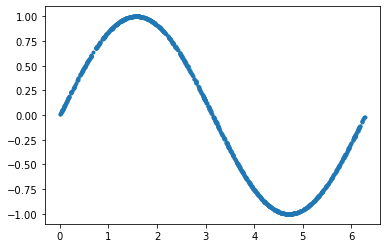

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

### Setting up the Discriminator Network

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            #n.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            #n.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            #n.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

### Setting up the Generator Network

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )
    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
generator = Generator()

# Training

In [10]:
lr = 0.0001
num_epochs = 300
loss_function = nn.BCELoss()  # Binary Cross Entropy Loss - Good for Binary Classification


In [11]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

### Training Loop

Epoch: 0


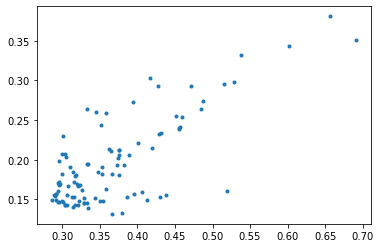

Epoch: 10


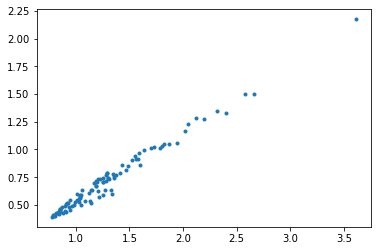

Epoch: 20


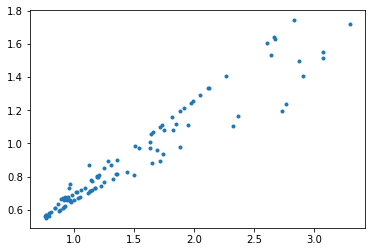

Epoch: 30


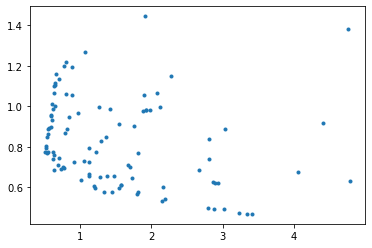

Epoch: 40


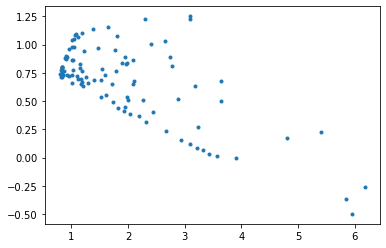

Epoch: 50


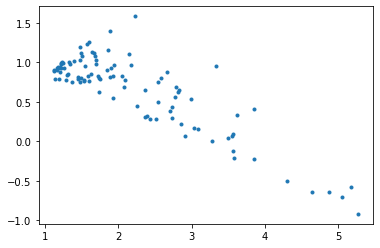

Epoch: 60


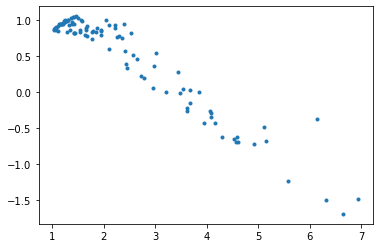

Epoch: 70


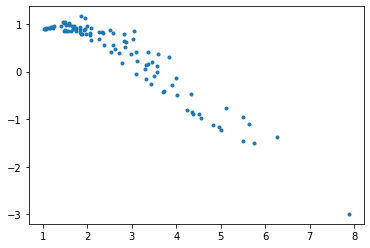

Epoch: 80


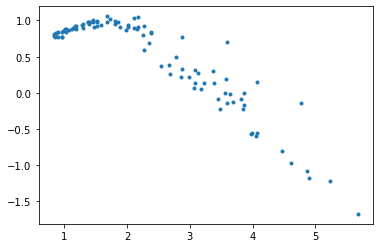

Epoch: 90


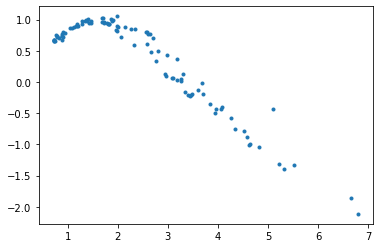

Epoch: 100


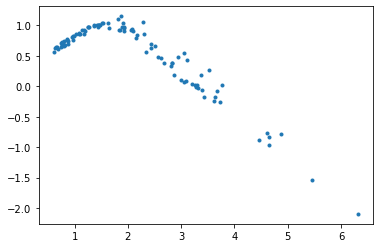

Epoch: 110


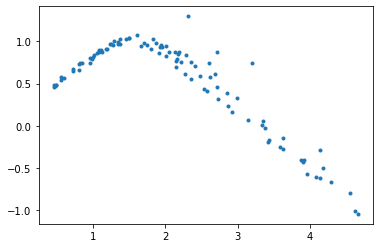

Epoch: 120


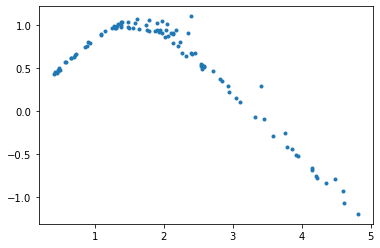

Epoch: 130


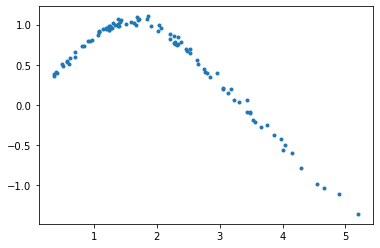

Epoch: 140


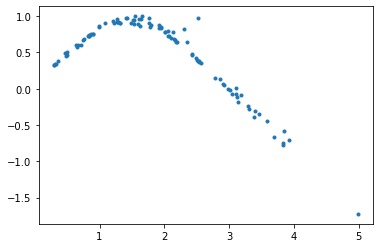

Epoch: 150


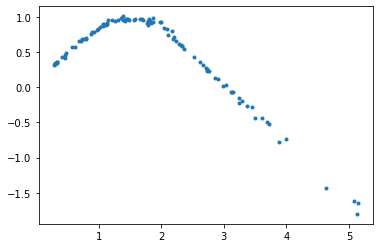

Epoch: 160


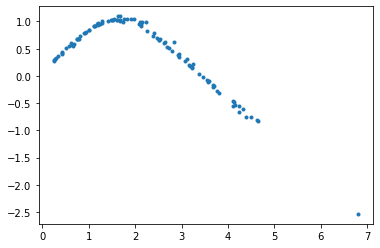

Epoch: 170


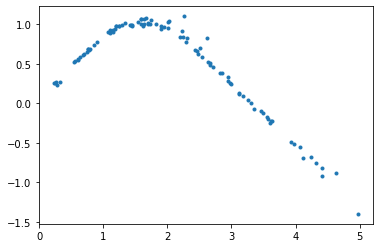

Epoch: 180


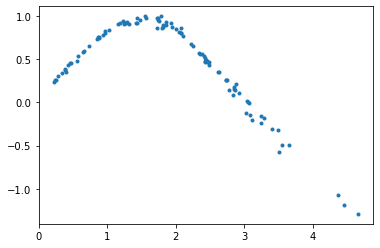

Epoch: 190


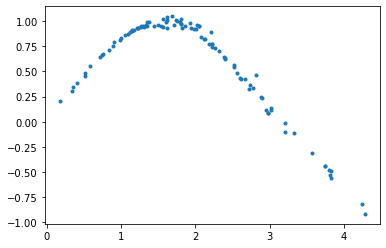

Epoch: 200


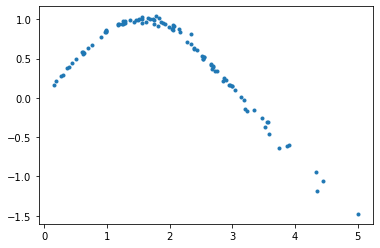

Epoch: 210


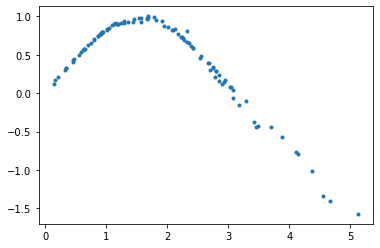

Epoch: 220


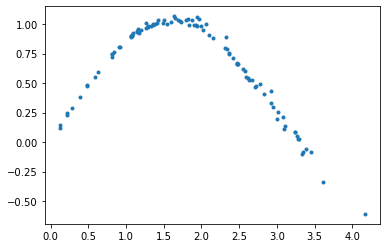

Epoch: 230


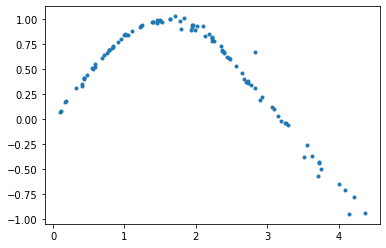

Epoch: 240


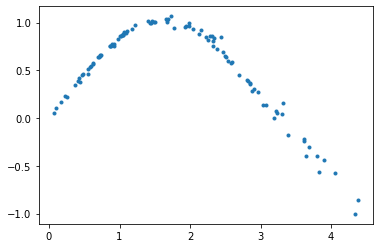

Epoch: 250


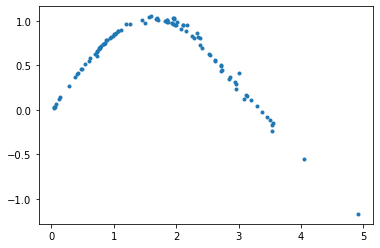

Epoch: 260


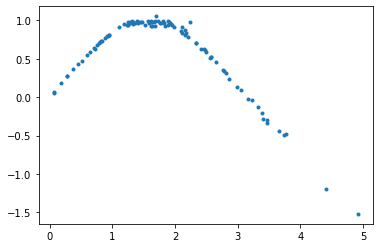

Epoch: 270


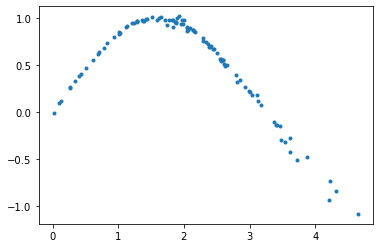

Epoch: 280


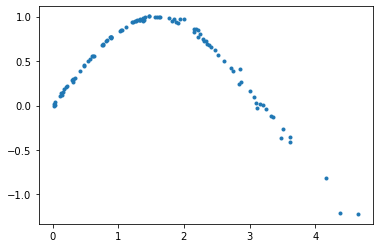

Epoch: 290


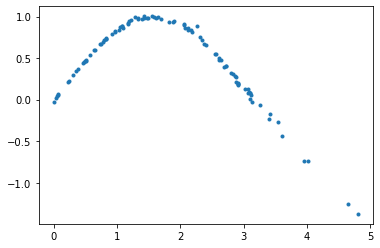

In [13]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the Discriminator Network
        real_samples_labels = torch.ones((batch_size, 1))
        # Why dimensionality 2? - direct latent space
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros(batch_size, 1)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))
        
        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        if (not epoch % 10) and (n==batch_size -1):
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:,0], generated_samples[:,1], ".")
            print(f"Epoch: {epoch}")
            plt.show()
                # Show Loss
#        if (not epoch % 10) and (n==batch_size -1):
#            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
#            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [14]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

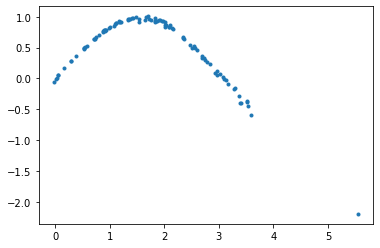

In [15]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0], generated_samples[:,1], ".")